# Problem Set 3

## Question 1

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


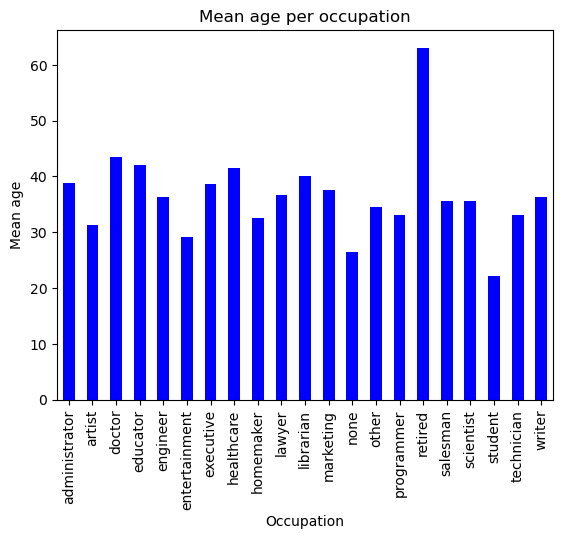


Average male ratio per occupation:
occupation
administrator    0.544304
artist           0.535714
doctor           1.000000
educator         0.726316
engineer         0.970149
entertainment    0.888889
executive        0.906250
healthcare       0.312500
homemaker        0.142857
lawyer           0.833333
librarian        0.431373
marketing        0.615385
none             0.555556
other            0.657143
programmer       0.909091
retired          0.928571
salesman         0.750000
scientist        0.903226
student          0.693878
technician       0.962963
writer           0.577778
Name: male_ratio, dtype: float64


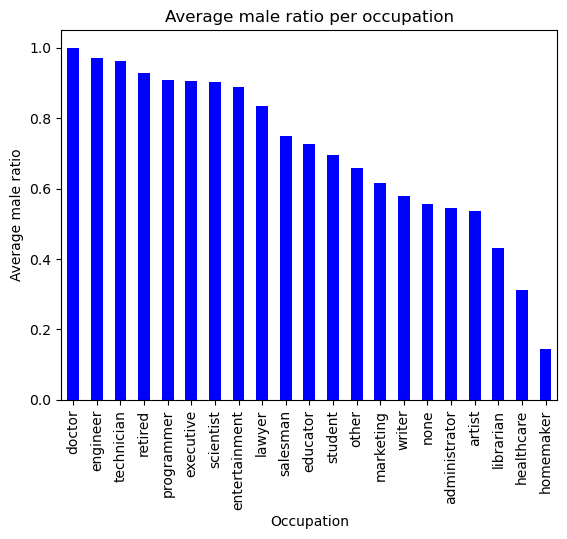


Age range per occupation:
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60

Mean age per occupation and gender:
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
            

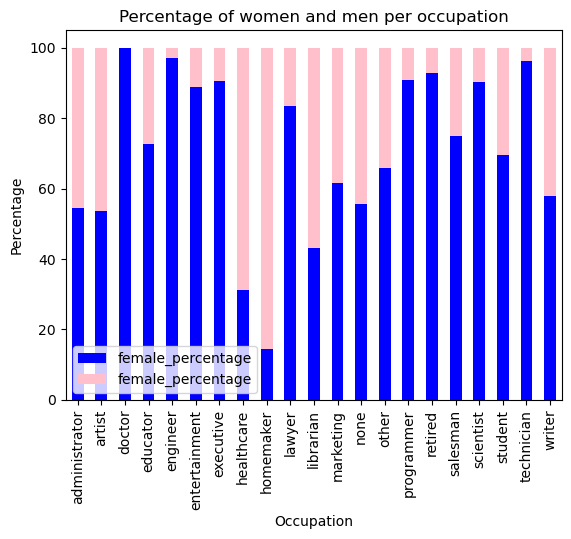

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep="|")


mean_age = users.groupby('occupation')['age'].mean()


print("Mean age per occupation:")
print(mean_age)


mean_age.plot(kind='bar', color='blue')
plt.xlabel('Occupation')
plt.ylabel('Mean age')
plt.title('Mean age per occupation')
plt.show()


def male_ratio(x):
    if x['gender'] == 'M':
        return 1
    else:
        return 0

users['male_ratio'] = users.apply(male_ratio, axis=1)


male_ratio = users.groupby('occupation')['male_ratio'].mean()


print("\nAverage male ratio per occupation:")
print(male_ratio)


male_ratio.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.xlabel('Occupation')
plt.ylabel('Average male ratio')
plt.title('Average male ratio per occupation')
plt.show()


age_range = users.groupby('occupation')['age'].agg(['min', 'max'])


print("\nAge range per occupation:")
print(age_range)


mean_age_by_occ_sex = users.groupby(['occupation', 'gender'])['age'].mean()


print("\nMean age per occupation and gender:")
print(mean_age_by_occ_sex)


def female_percentage(x):
    if x['gender'] == 'F':
        return 1
    else:
        return 0

users['female_percentage'] = users.apply(female_percentage, axis=1)

female_percentage = users.groupby('occupation')['female_percentage'].mean() * 100
male_percentage = 100 - female_percentage

print("\nPercentage of women and men per occupation:")
print(pd.concat([male_percentage, female_percentage], axis=1))

gender_percentage = pd.concat([male_percentage, female_percentage], axis=1)
gender_percentage.plot(kind='bar', stacked=True, color=['blue', 'pink'])
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.title('Percentage of women and men per occupation')
plt.show()

## Question 2

Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

Top 10 rows of the Euro 2012 dataset:


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17



Summary statistics of the numerical columns:


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


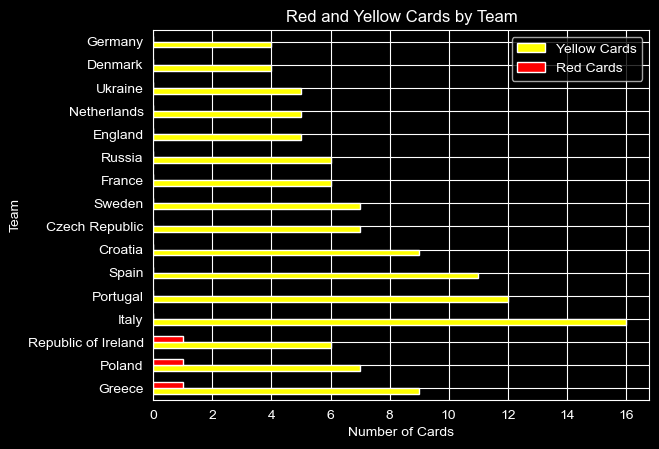


Disciplinary information for teams that scored more than 6 goals:


,Team,Yellow Cards,Red Cards
13,Spain,11,0
5,Germany,4,0


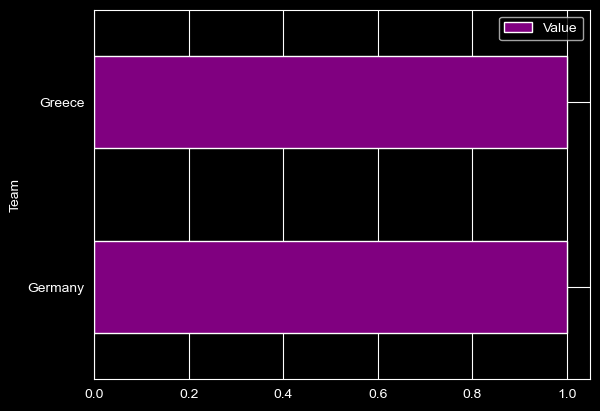

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)


print("Top 10 rows of the Euro 2012 dataset:")
display(euro12)

print("\nSummary statistics of the numerical columns:")
display(euro12)

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
discipline.plot.barh(x='Team', color=['yellow', 'red'], edgecolor='white')
plt.title("Red and Yellow Cards by Team")
plt.xlabel("Number of Cards")
plt.show()


g_teams = euro12[euro12['Team'].str.startswith('G')][['Team']]
g_teams['Value'] = 1 
g_teams.plot.barh(x='Team', y='Value', color='purple', edgecolor='white')



high_scoring_teams = euro12[euro12['Goals'] > 6][['Team', 'Yellow Cards', 'Red Cards']]
high_scoring_teams = high_scoring_teams.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
print("\nDisciplinary information for teams that scored more than 6 goals:")
display(high_scoring_teams)

# #Question 3

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


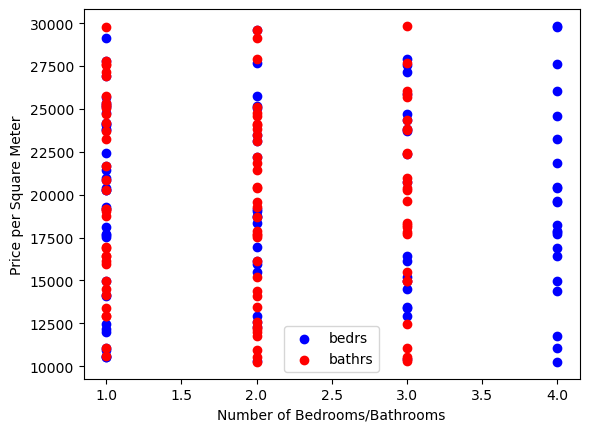

RangeIndex(start=0, stop=300, step=1)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))
df = pd.concat([series1, series2, series3], axis=1)
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
plt.scatter(df['bedrs'], df['price_sqr_meter'], c='blue', label='bedrs')
plt.scatter(df['bathrs'], df['price_sqr_meter'], c='red', label='bathrs')
plt.xlabel('Number of Bedrooms/Bathrooms')
plt.ylabel('Price per Square Meter')
plt.legend()
plt.show()
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn)
print(bigcolumn.index)


## Question 4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on B
January 2 1961) for the first 52 weeks.

              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
date                             
1961-01-01  12.58  18.50  15.04  
1961-01-02   9.67  17.54  13.83  
1961-01-03   7.67  12.75  12.71  
1961-01-04   5.88   5.46  10.88  
1961-01-05  10.34  12.92  11.83  
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
78857
10.227982360836924
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.

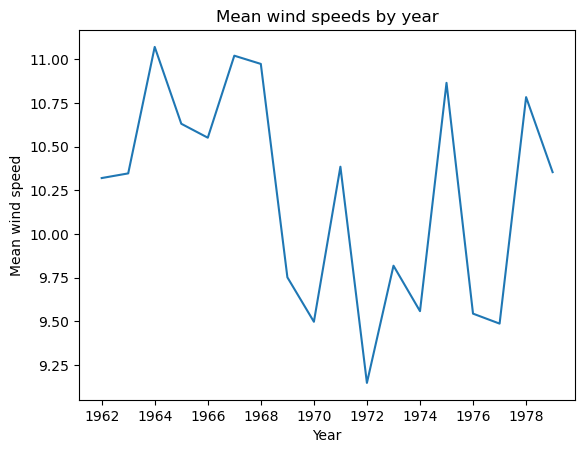

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

78857

10.227982360836924

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


,min,max,mean,std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('wind.txt', delim_whitespace=True, na_values='NaN')
data['date'] = pd.to_datetime((data.Yr + 1900)*10000 + data.Mo*100 + data.Dy, format='%Y%m%d')
data = data.drop(['Yr','Mo','Dy'], axis=1)
data = data.set_index('date')
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.Timestamp(year=year, month=x.month, day=x.day)

data.index = data.index.map(fix_year)
data.index = pd.to_datetime(data.index)
missing_values = data.isnull().sum()
non_missing_values = data.notnull().sum().sum()
mean_windspeeds = data.mean().mean()
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
january_data = data[data.index.month == 1]
january_data.groupby(january_data.index.year).mean()
yearly_data = data.resample('Y').mean()
monthly_data = data.resample('M').mean()
weekly_data = data.resample('W').mean()
weekly_stats = weekly_data.resample('W').agg(['min', 'max', 'mean', 'std']).loc['1961-01-02':'1961-12-24'][:52]
print(data.head())
print(data.isna().sum())
print(data.notna().sum().sum())
print(data.mean().mean())
print(loc_stats)
print(day_stats)
data = data.resample('D').ffill() 
data.index.name = 'date'
print(data[data.index.month == 1].groupby('date').mean())
print(data.groupby(data.index.month).mean())
data.resample('M').mean()
print(data.resample('W').mean())
print(weekly_stats)
yearly_data = data.resample('Y').mean()
plt.plot(yearly_data.index, yearly_data.mean(axis=1))
plt.xlabel('Year')
plt.ylabel('Mean wind speed')
plt.title('Mean wind speeds by year')
plt.show()
missing_values = data.isnull().sum()
non_missing_values = data.notnull().sum().sum()
mean_windspeeds = data.mean().mean()
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})
display(missing_values)
display(non_missing_values)
display(mean_windspeeds)
display(loc_stats)
display(day_stats)



# Question 5

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

<function matplotlib.pyplot.show(close=None, block=None)>

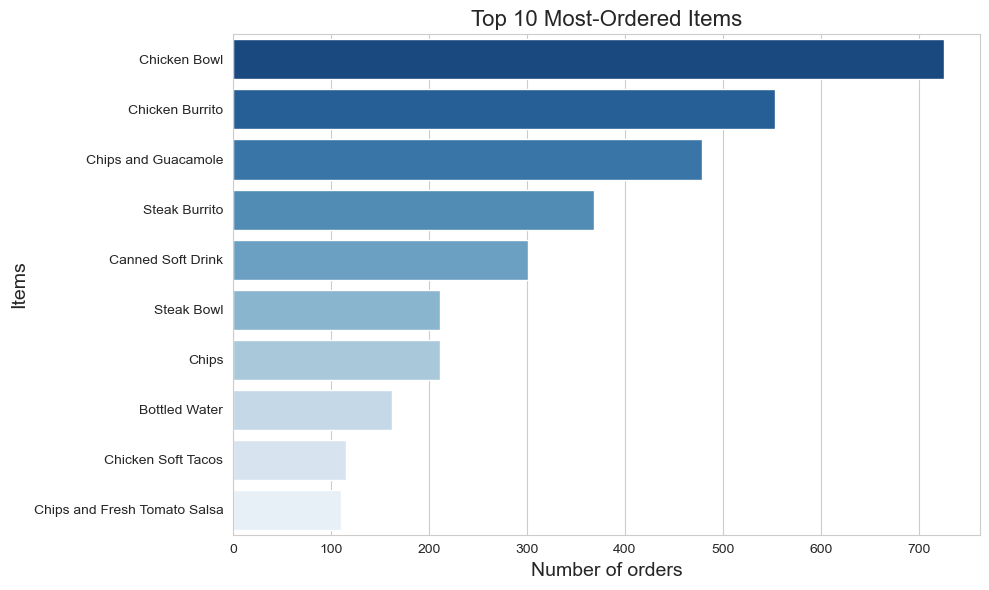

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

print(chipo.head(10))

print(f'Number of observations: {len(chipo)}')

print(f'Number of columns: {len(chipo.columns)}')

print('Columns:', chipo.columns.tolist())

print(f'Index: {chipo.index}')

most_ordered_item = chipo['item_name'].value_counts().idxmax()
print(f'Most-ordered item: {most_ordered_item}')

most_ordered_item_quantity = chipo[chipo["item_name"]==most_ordered_item]["quantity"].sum()
print(f'Number of {most_ordered_item} ordered: {most_ordered_item_quantity}')

print(f"Most ordered item in the 'choice_description' column: {chipo['choice_description'].value_counts().idxmax()}")

total_items_ordered = chipo['quantity'].sum()
print(f"Total items ordered: {total_items_ordered}")

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print('Type of item_price column:', chipo['item_price'].dtype)

revenue = (chipo['quantity']*chipo['item_price']).sum()
print(f"Revenue for the period: ${revenue:.2f}")

num_orders = chipo['order_id'].nunique()
print(f"Number of orders: {num_orders}")

avg_revenue = revenue/num_orders
print(f"Average revenue amount per order: ${avg_revenue:.2f}")

num_items_sold = chipo['item_name'].nunique()
print(f"Number of different items sold: {num_items_sold}")

results = pd.DataFrame({
    'Metric': ['Number of observations', 'Number of columns', 'Most-ordered item', 'Number of most-ordered item ordered',
               "Most ordered item in the 'choice_description' column", 'Total items ordered', 'Revenue for the period',
               'Number of orders', 'Average revenue amount per order', 'Number of different items sold'],
    'Value': [len(chipo), len(chipo.columns), most_ordered_item, most_ordered_item_quantity,
              chipo['choice_description'].value_counts().idxmax(), total_items_ordered, f"${revenue:.2f}",
              num_orders, f"${avg_revenue:.2f}", num_items_sold]
})
print('\n', tabulate(results, headers='keys', tablefmt='fancy_grid'))
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x=chipo['item_name'].value_counts().head(10).values, y=chipo['item_name'].value_counts().head(10).index, palette='Blues_r')
ax.set_xlabel('Number of orders', fontsize=14)
ax.set_ylabel('Items', fontsize=14)
ax.set_title('Top 10 Most-Ordered Items', fontsize=16)
plt.tight_layout()
plt.show

## Question 6

Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

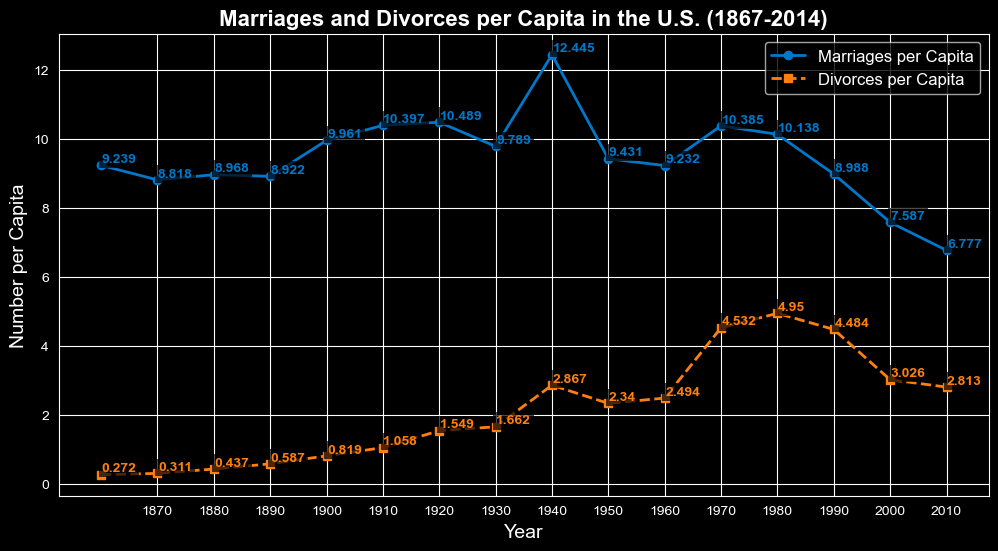

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\manav\Desktop\us-marriages-divorces-1867-2014.csv')

df['Marriages per Capita'] = df['Marriages'] / df['Population']* 1000

df['Divorces per Capita'] = df['Divorces'] / df['Population']* 1000

df = df.set_index('Year')

df_decade = df.groupby(df.index//10*10).mean()

plt.style.use('dark_background')

plt.plot(df_decade.index, df_decade['Marriages per Capita'], label='Marriages per Capita', linestyle='-', linewidth=2, marker='o', markersize=6, color='#0077c8')
plt.plot(df_decade.index, df_decade['Divorces per Capita'], label='Divorces per Capita', linestyle='--', linewidth=2, marker='s', markersize=6, color='#ff7f0e')

for i, v in enumerate(df_decade['Marriages per Capita']):
    plt.text(df_decade.index[i]+0.1, v+0.001, str(round(v, 3)), fontsize=10, color='#0077c8', bbox=dict(facecolor='black', edgecolor='none', pad=2, alpha=0.7), fontweight='bold', va='bottom')
for i, v in enumerate(df_decade['Divorces per Capita']):
    plt.text(df_decade.index[i]+0.1, v+0.001, str(round(v, 3)), fontsize=10, color='#ff7f0e', bbox=dict(facecolor='black', edgecolor='none', pad=2, alpha=0.7), fontweight='bold', va='bottom')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number per Capita', fontsize=14)
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(range(1870, 2020, 10))
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()


# #Question 7

Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [3]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("us-marriages-divorces-1867-2014.csv")

df = df[df["Year"].isin([1900, 1950, 2000])]

fig = go.Figure()

fig.add_trace(go.Bar(x=df["Year"] - 3, y=df["Marriages_per_1000"], name="Marriages per capita", marker_color="#008fd5"))
fig.add_trace(go.Bar(x=df["Year"], y=df["Divorces_per_1000"], name="Divorces per capita", marker_color="#fc4f30"))

for index, row in df.iterrows():
    fig.add_annotation(x=row["Year"] - 3, y=row["Marriages_per_1000"], text=str(row["Marriages_per_1000"]),
                       font=dict(color='white', size=16), showarrow=False, align='center',
                       xanchor='center', yanchor='bottom', yshift=5, bgcolor='black', opacity=0.8)
    fig.add_annotation(x=row["Year"], y=row["Divorces_per_1000"], text=str(row["Divorces_per_1000"]),
                       font=dict(color='white', size=16), showarrow=False, align='center',
                       xanchor='center', yanchor='bottom', yshift=5, bgcolor='black', opacity=0.8)

fig.update_layout(title="Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)",
                  xaxis_title="Year",
                  yaxis_title="Per Capita",
                  font=dict(size=14),
                  legend=dict(font=dict(size=14)),
                  plot_bgcolor='white',
                  barmode='group',
                  bargap=0.2,
                  bargroupgap=0.1)

fig.show()


## Question 8


Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

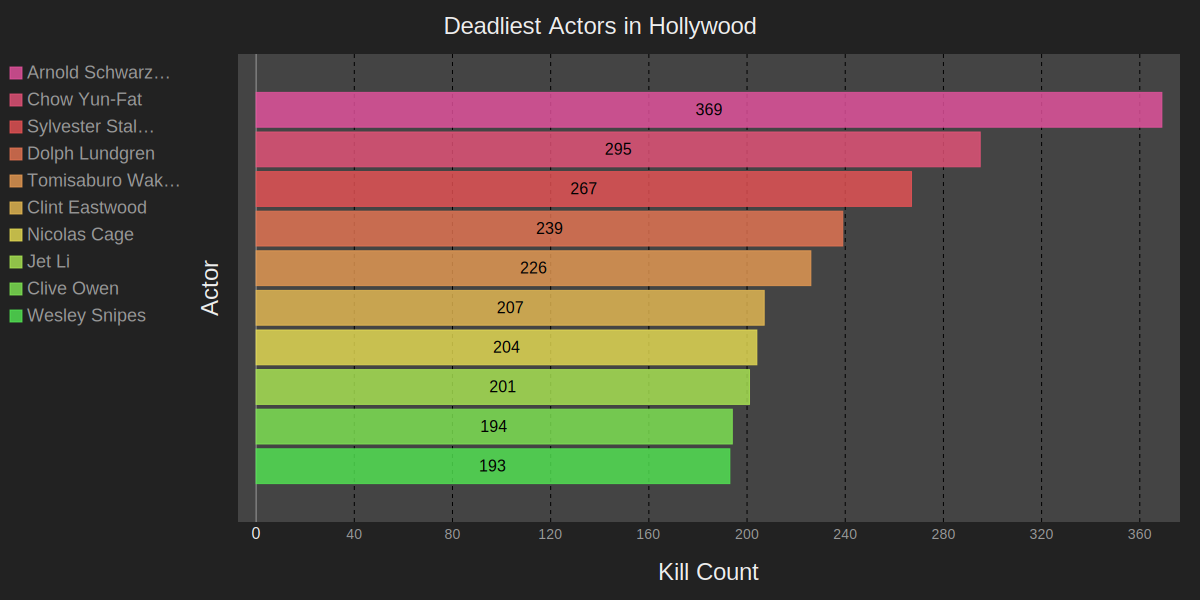

In [7]:
import pandas as pd
import pygal

data = pd.read_csv("actor_kill_counts.csv")

data = data.sort_values('Count', ascending=False)

bar_chart = pygal.HorizontalBar(
    title='Deadliest Actors in Hollywood',
    x_title='Kill Count',
    y_title='Actor',
    style=pygal.style.DarkStyle(
        background='#222222',
        plot_background='#444444',
        colors=('#E853A0', '#E8537A', '#E95355', '#E87653', '#E89B53',
                '#E8BC53', '#E8DE53', '#ABE853', '#80E853', '#53E853'),
        font_family='Arial',
        title_font_size=24,
        label_font_size=14,
        major_label_font_size=16,
        legend_font_size=18,
        tooltip_font_size=16,
    ),
    width=1200,
    height=600,
    show_legend=True,
    show_x_labels=True,
    show_y_labels=True,
    print_values=True,
    value_formatter=lambda x: "{:,}".format(int(x)),
    human_readable=True,
    truncate_label=-1,
)
for actor, count in zip(data['Actor'], data['Count']):
    bar_chart.add(actor, count)
from IPython.display import SVG, display
display(SVG(bar_chart.render()))


## Question 9

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.


In [10]:
import pandas as pd
import plotly.graph_objs as go

data = pd.read_csv("roman-emperor-reigns.csv")

assassinated = data[data['Cause_of_Death'].str.contains('assassinated', case=False)]
frac_assassinated = len(assassinated) / len(data)

natural_causes = data[data['Cause_of_Death'].str.contains('natural causes', case=False)]
frac_natural_causes = len(natural_causes) / len(data)


other_causes = data[~data['Cause_of_Death'].str.contains('assassinated|natural causes', case=False)]
frac_other_causes = len(other_causes) / len(data)

fig = go.Figure(data=[go.Pie(labels=['Assassinated ({:.1%})'.format(frac_assassinated),
                                      'Natural Causes ({:.1%})'.format(frac_natural_causes),
                                      'Other Causes ({:.1%})'.format(frac_other_causes)],
                             values=[len(assassinated), len(natural_causes), len(other_causes)],
                             textposition='inside',
                             hole=0.7)])

fig.update_layout(
    title={
        'text': "Causes of Death for Roman Emperors",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title="Cause of Death",
    annotations=[dict(text="Emperors", x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.update_traces(textinfo='label+percent', marker=dict(colors=['#B3E5FC', '#4DB6AC', '#FFC107']))

fig.show()


# #10

Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

In [4]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
fig = px.scatter(df, x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)",
                 color="Year", hover_name="Year",
                 labels={"Total Arcade Revenue (billions)": "Total Arcade Revenue (billions)", 
                         "Computer Science Doctorates Awarded (US)": "Computer Science Doctorates Awarded (US)"},
                 title="Relationship between Arcade Revenue and CS Doctorates Awarded (2000-2009)",
                 size="Year", trendline="ols", color_continuous_scale="RdYlBu",
                 text="Year")

fig.update_traces(textposition="top center")

fig.show()
